In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter

In [178]:
# Save data in a DataFrame
data = pd.read_csv('/content/clean_secular_talk_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   videoId           19999 non-null  object 
 1   title             19999 non-null  object 
 2   description       19622 non-null  object 
 3   tags              19570 non-null  object 
 4   publishedAt       19999 non-null  object 
 5   duration          19999 non-null  object 
 6   category          19999 non-null  object 
 7   viewCount         19999 non-null  int64  
 8   likeCount         19999 non-null  int64  
 9   commentCount      19998 non-null  float64
 10  duration_seconds  19999 non-null  int64  
 11  duration_minutes  19999 non-null  float64
 12  duration_hours    19999 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [179]:
# filter videos that last more than 3 hours
data = data.loc[data["duration_seconds"] < 3 * 3600].copy()

# delete videos with more like than views
data = data[~(data["likeCount"] > data["viewCount"])]

# clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# filter counts
attributes = [
    "publishedAt",
    "viewCount",
    "likeCount",
    "commentCount"
]

data = data[attributes]

# filter data from 1/1/2020 to 12/31/2025
data = data[data["publishedAt"].between("2020-01-01", "2025-12-31 23:59:59")]

# Explore data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9305 entries, 13 to 9324
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   publishedAt   9305 non-null   datetime64[ns, UTC]
 1   viewCount     9305 non-null   int64              
 2   likeCount     9305 non-null   int64              
 3   commentCount  9305 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 363.5 KB


In [180]:
# group data by month-year
monthly_data = data.groupby(data["publishedAt"].dt.to_period("M")).agg({
    "viewCount": "sum",
    "likeCount": "sum",
    "commentCount": "sum"
    })

# turn index to time stamp
monthly_data.index = monthly_data.index.to_timestamp()

# metrics
monthly_data["like_rate"] = 100 * monthly_data["likeCount"] / monthly_data["viewCount"]
monthly_data["comment_rate"] = 100 * monthly_data["commentCount"] / monthly_data["viewCount"]

# explore data structure
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2020-01-01 to 2025-12-01
Freq: MS
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   viewCount     72 non-null     int64  
 1   likeCount     72 non-null     int64  
 2   commentCount  72 non-null     float64
 3   like_rate     72 non-null     float64
 4   comment_rate  72 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.4 KB


/tmp/ipython-input-2070975563.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = data.groupby(data["publishedAt"].dt.to_period("M")).agg({


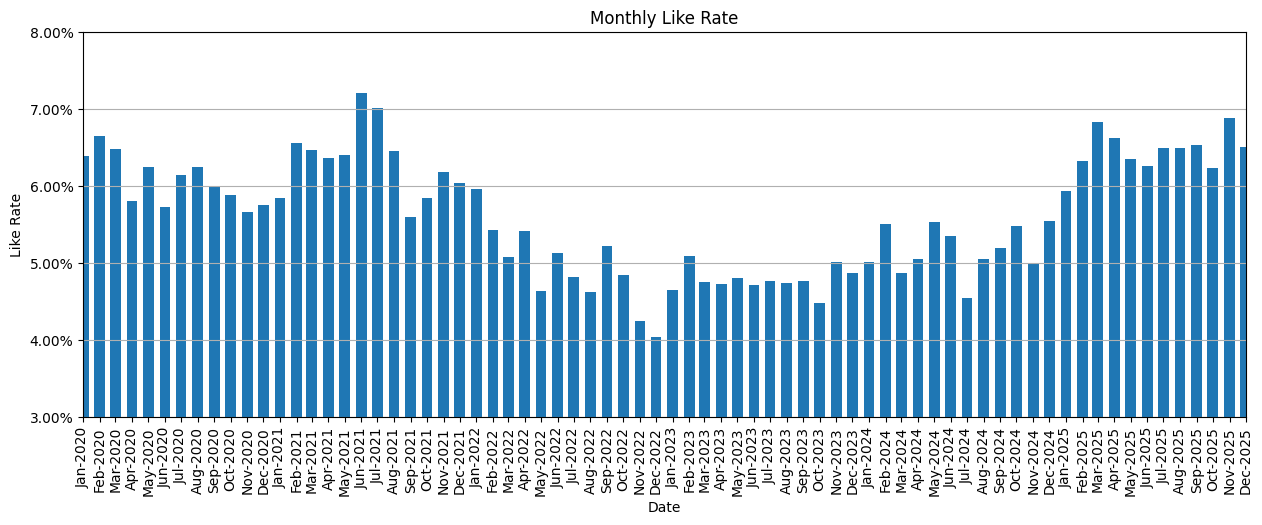

In [181]:
# bar graph: like rate
plt.figure(figsize=(15, 5))
plt.bar(monthly_data.index, monthly_data["like_rate"], width=20)
plt.title("Monthly Like Rate")
plt.xlabel("Date")
plt.ylabel("Like Rate")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())
ax.set_ylim(3, 8)

plt.show()

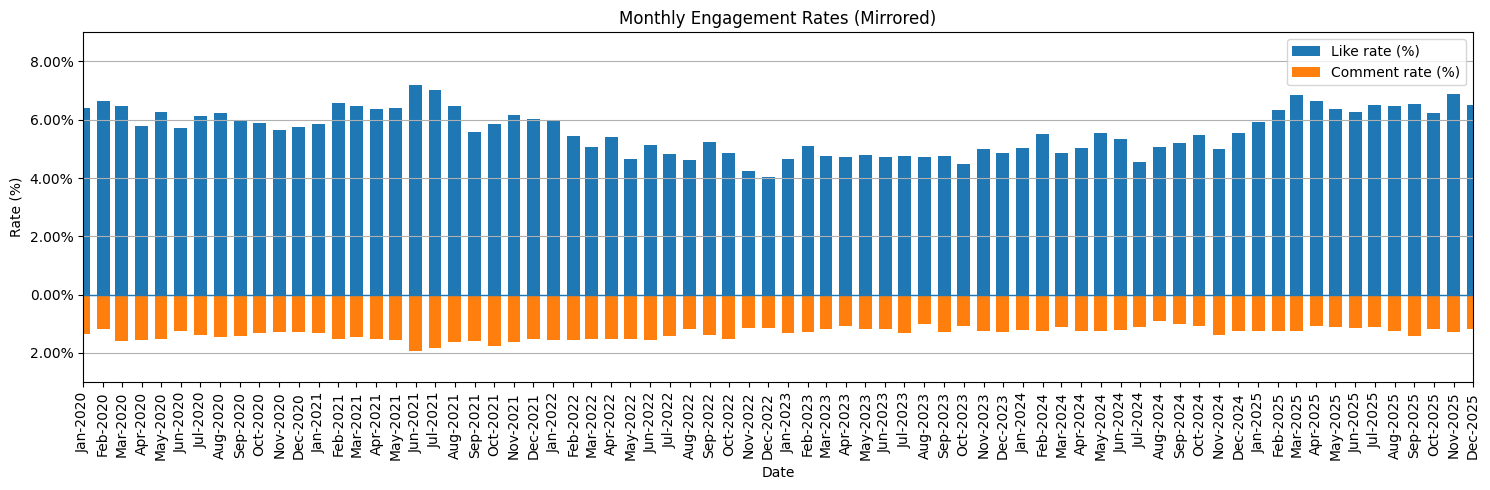

In [182]:
# rate bar chart

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(monthly_data.index, monthly_data["like_rate"], width=20, label="Like rate (%)") # Likes (positive)
ax.bar(monthly_data.index, -(monthly_data["comment_rate"]), width=20, label="Comment rate (%)") # Comments (negative)
ax.axhline(0, linewidth=1) # center

ax.set_title("Monthly Engagement Rates (Mirrored)")
ax.set_xlabel("Date")
ax.set_ylabel("Rate (%)")
ax.grid(axis="y", alpha=1)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
plt.xticks(rotation=90)

ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())
ax.set_ylim(-3, 9)

ax.legend()
plt.tight_layout()
plt.show()

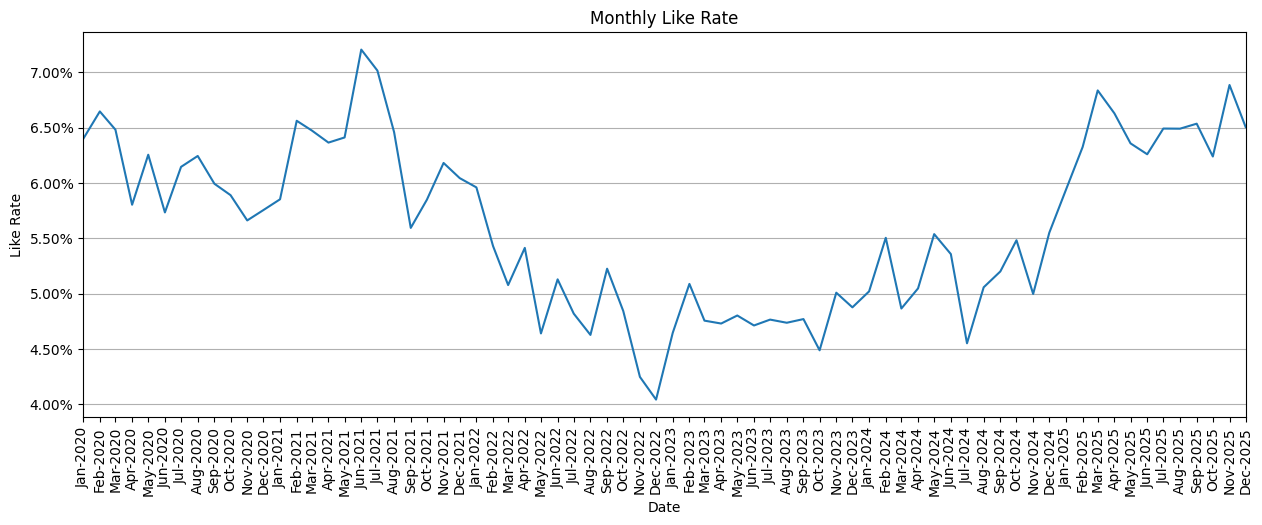

In [183]:
# line graph: like rate
plt.figure(figsize=(15, 5))
plt.plot(monthly_data.index, monthly_data["like_rate"])
plt.title("Monthly Like Rate")
plt.xlabel("Date")
plt.ylabel("Like Rate")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())

plt.show()

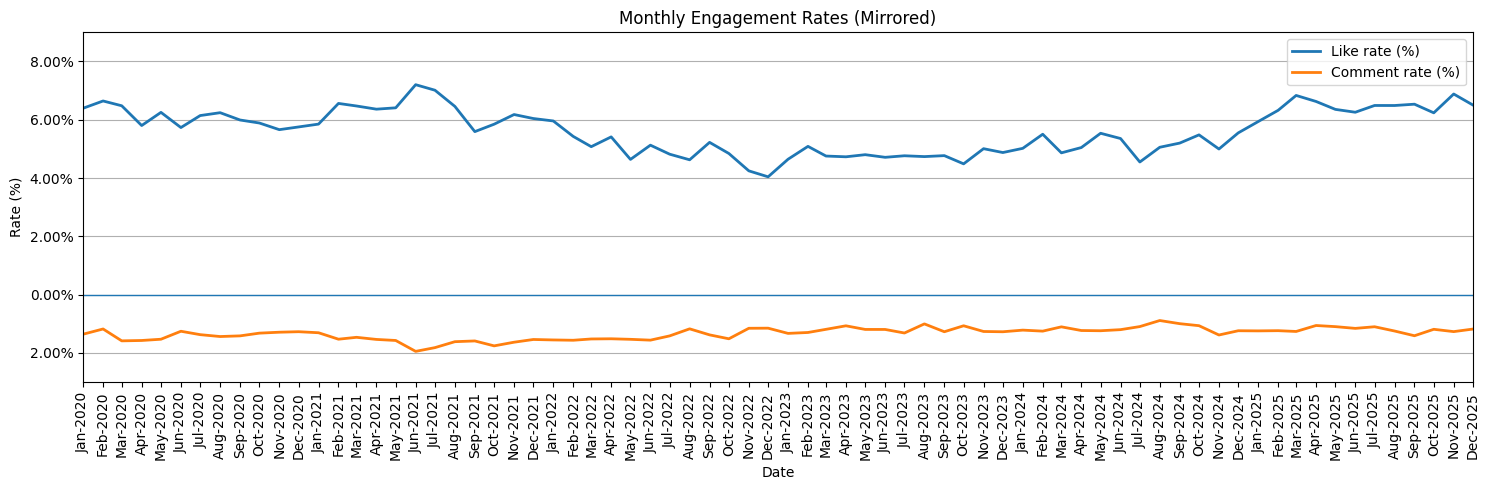

In [184]:
# rate line graph

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(monthly_data.index,monthly_data["like_rate"],linewidth=2,label="Like rate (%)") # Likes (positive)
ax.plot(monthly_data.index,(-monthly_data["comment_rate"]),linewidth=2,label="Comment rate (%)") # Comments (negative)
ax.axhline(0, linewidth=1) # Center line

ax.set_title("Monthly Engagement Rates (Mirrored)")
ax.set_xlabel("Date")
ax.set_ylabel("Rate (%)")
ax.grid(axis="y", alpha=1)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
plt.xticks(rotation=90)

ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())
ax.set_ylim(-3, 9)

ax.legend()
plt.tight_layout()
plt.show()

In [185]:
# tidy frame
monthly_tidy = monthly_data[["like_rate"]].assign(
    year=monthly_data.index.year,
    month=monthly_data.index.month
)

# pivot: months as rows, years as columns
monthly_pivot = (monthly_data["like_rate"]
                 .to_frame()
                 .assign(
                     year=monthly_data.index.year,
                     month=monthly_data.index.month
                 )
                 .pivot_table(
                     index="month",
                     columns="year",
                     values="like_rate",
                     aggfunc="mean"
                 )
                 .sort_index()
)

# fix x axis
month_order = list(range(1, 13))
monthly_pivot = monthly_pivot.reindex(month_order)

monthly_pivot.index = monthly_pivot.index.map(
    lambda m: pd.to_datetime(f"{m:02d}", format="%m").strftime("%b")
)

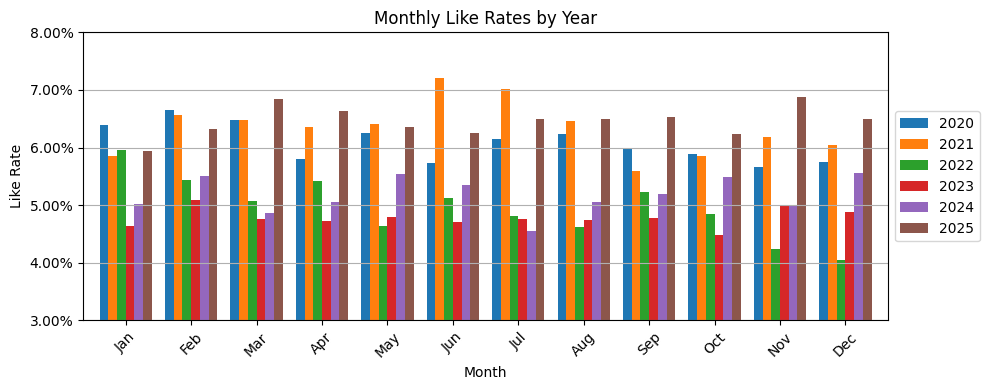

In [186]:
# grouped bar chart
ax = monthly_pivot.plot(kind="bar", figsize=(10, 4), width=0.8)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
ax.set_xlabel("Month")
ax.set_ylabel("Like Rate")
ax.set_title("Monthly Like Rates by Year")
ax.grid(axis="y", alpha=1)
ax.legend(title="Year")
ax.set_ylim(3, 8)
ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

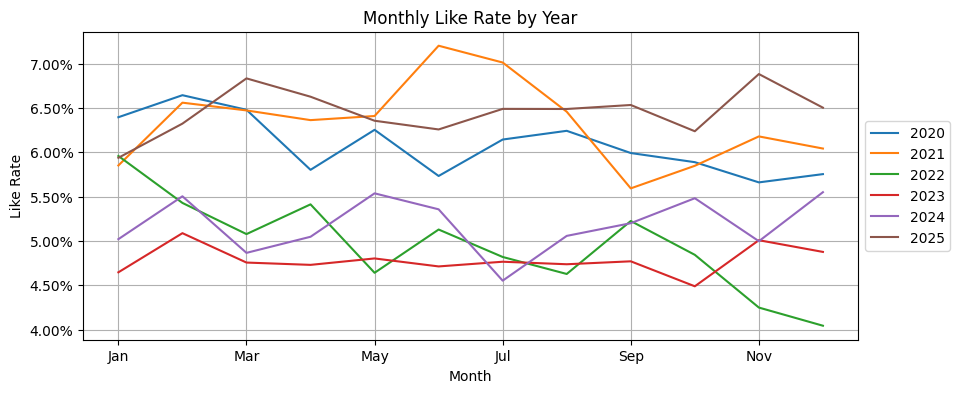

In [187]:
# line graph
ax = monthly_pivot.plot(kind="line", figsize=(10, 4))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
ax.set_xlabel("Month")
ax.set_ylabel("Like Rate")
ax.set_title("Monthly Like Rate by Year")
ax.grid(True, alpha=1)
ax.legend(title="Year")
ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.show()

/tmp/ipython-input-467140525.py:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


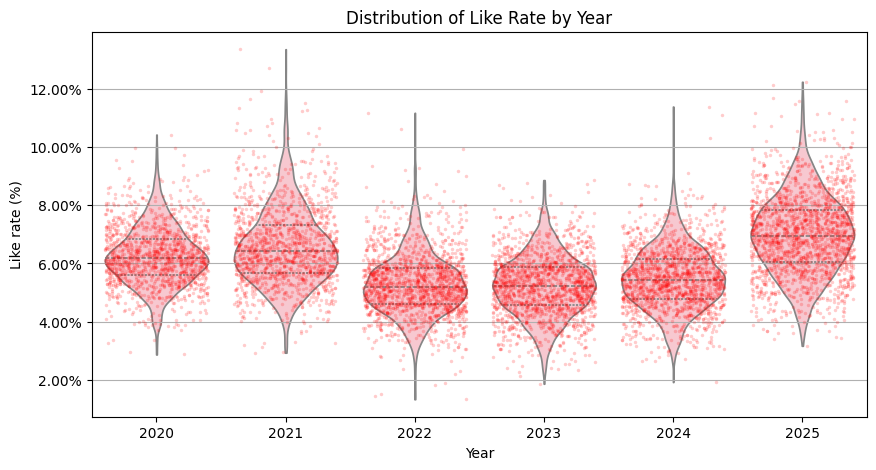

In [192]:
# violin plots

df = (
    data.assign(
        publishedAt=lambda d: pd.to_datetime(d["publishedAt"], errors="coerce"),
        like_rate=lambda d: 100 * d["likeCount"] / d["viewCount"].replace(0, np.nan),
        year=lambda d: pd.to_datetime(d["publishedAt"]).dt.year
        )
    .dropna(subset=["like_rate", "year"])
    .query("0 <= like_rate <= 100")
)

# Outlier trimming
lo, hi = df["like_rate"].quantile([0.00001, 0.99999])
df = df[df["like_rate"].between(lo, hi)]

# Plot
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df, x="year", y="like_rate", color="pink",
    inner="quartile", cut=0, scale="width", bw_adjust=0.8
)

sns.stripplot(
    data=df, x="year", y="like_rate", color="red",
    size=2.5, alpha=0.2, jitter=0.40
)

plt.grid(axis="y", alpha=1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{abs(y):,.2f}%"))
plt.xlabel("Year")
plt.ylabel("Like rate (%)")
plt.title("Distribution of Like Rate by Year")
plt.show()